In [2]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('D:\Some Python')


In [3]:
df = pd.read_csv('2018_EDIFICACIONES_BDD.csv')
df.columns

Index(['id', 'codprovf', 'nombreprov', 'codcantf', 'nombrecanton', 'CAREAUR',
       'fper', 'mes', 'anio', 'propie', 'cimi', 'estru', 'pared', 'cubi',
       'CPERM', 'CTIPOBR', 'CORES', 'NUCUCAL', 'COAMS', 'NUPICAL', 'NUDOCAL',
       'CDISPUSO', 'CDISPRFI', 'CVAE', 'CNUVICAL', 'CARES', 'm2 de const',
       'CARNRES', 'CARDPAR', 'CAESV', 'CSUTE', 'CARCO', 'CDISPSUT',
       'CDISPARC'],
      dtype='object')

In [4]:
df

,id,codprovf,nombreprov,codcantf,nombrecanton,CAREAUR,fper,mes,anio,propie,...,CNUVICAL,CARES,m2 de const,CARNRES,CARDPAR,CAESV,CSUTE,CARCO,CDISPSUT,CDISPARC
0,81688,14,MORONA SANTIAGO,1401,MORONA,1,1/2/2018,1,2018,1,...,1,191.0,101-200,0,0,1000.0,1131.0,191.0,8.0,2.0
1,81689,14,MORONA SANTIAGO,1401,MORONA,1,1/9/2018,1,2018,1,...,1,246.0,201-300,0,0,602.0,763.0,246.0,8.0,3.0
2,81690,14,MORONA SANTIAGO,1401,MORONA,1,1/17/2018,1,2018,1,...,1,166.0,101-200,0,0,280.0,446.0,166.0,5.0,2.0
3,81691,17,PICHINCHA,1701,QUITO,2,2/14/2018,2,2018,1,...,1,154.0,101-200,0,0,75.0,144.0,154.0,2.0,2.0
4,81692,10,IMBABURA,1001,IBARRA,1,1/22/2018,1,2018,1,...,2,252.0,201-300,0,0,152.0,260.0,252.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30625,112409,18,TUNGURAHUA,1801,AMBATO,1,4/20/2018,4,2018,1,...,1,89.0,0-100,0,0,0.0,0.0,89.0,1.0,1.0
30626,112410,22,ORELLANA,2204,LORETO,1,7/6/2018,7,2018,1,...,1,118.0,101-200,0,0,381.0,499.0,118.0,5.0,2.0
30627,112411,22,ORELLANA,2201,ORELLANA,1,1/30/2018,1,2018,1,...,1,114.0,101-200,0,0,646.0,760.0,114.0,8.0,2.0
30628,112412,16,PASTAZA,1601,PASTAZA,1,10/4/2018,10,2018,1,...,1,50.0,0-100,50,0,50.0,100.0,100.0,2.0,2.0


# RURAL vs URBANO

In [5]:
urbano = df.loc[df['CAREAUR']==1].count()[0] #same result: df['CAREAUR'].value_counts()
rural = df.loc[df['CAREAUR']==2].count()[0]

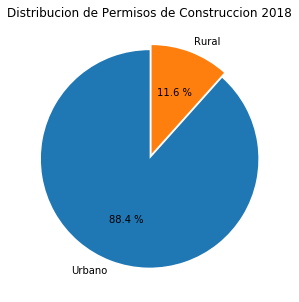

In [62]:
plt.figure(figsize=(10, 5))
labels_ = ['Urbano', 'Rural']
plt.title('Distribucion de Permisos de Construccion 2018')
plt.pie ([urbano, rural], labels = labels_, explode = (0,0.05),autopct='%.1f %%', startangle=90)
plt.show() 

# Provincias con mayor numero de permisos emitidos

In [7]:
a = df['nombreprov'].value_counts().sort_values(ascending = False)
a.head(5)

GUAYAS        9114
PICHINCHA     2937
MANABI        2039
AZUAY         2022
TUNGURAHUA    1971
Name: nombreprov, dtype: int64

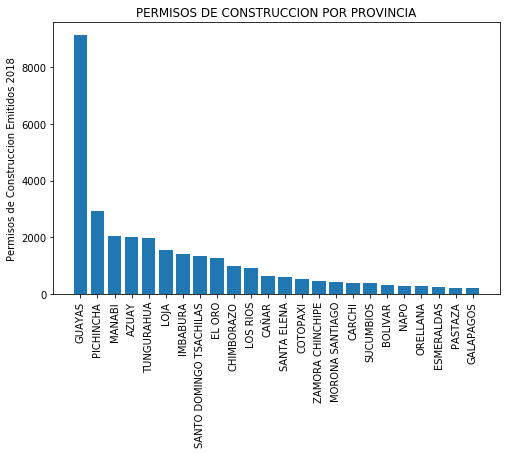

In [8]:
byprov = df.groupby('nombreprov').count()
byprov = byprov.reset_index()
byprov = byprov.sort_values('id', ascending = False)
provincias = byprov['nombreprov']
permisos = byprov['id']

plt.figure(figsize=(8, 5))
plt.bar (provincias, permisos)
plt.xticks(provincias, rotation = '90')
plt.ylabel('Permisos de Construccion Emitidos 2018')
plt.title('PERMISOS DE CONSTRUCCION POR PROVINCIA')
plt.show()

# Cantones con mayor numero de permisos de construcción emitidos

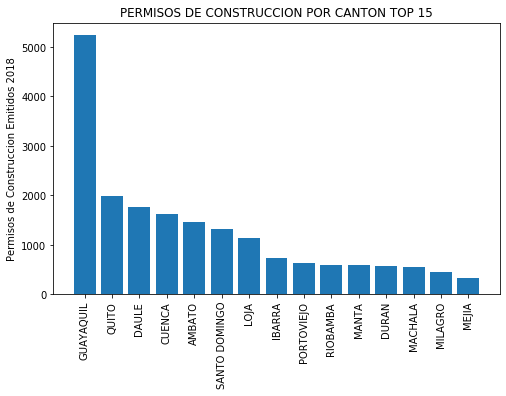

In [9]:
bycanton = df.groupby('nombrecanton').count()
bycanton = bycanton.reset_index()
bycanton = bycanton.sort_values('id', ascending = False)
cantones = bycanton['nombrecanton'].tolist()
permisos = bycanton['id'].tolist()
cantones2 = cantones[:15]
permisos2 = permisos[:15]

plt.figure(figsize=(8, 5))
plt.bar (cantones2, permisos2)
plt.xticks(cantones2, rotation = '90')
plt.ylabel('Permisos de Construccion Emitidos 2018')
plt.title('PERMISOS DE CONSTRUCCION POR CANTON TOP 15')
plt.show()


# Tipo de construccion RESIDENCIAL por cantón

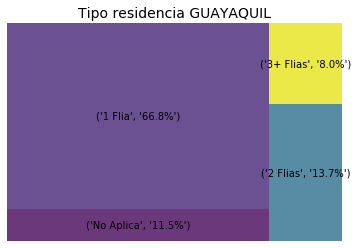

In [10]:
gyeres = df.loc[df['nombrecanton']=='GUAYAQUIL']
gyeres = gyeres.groupby('CORES').count()
gyeres = gyeres.reset_index()
gyeres = gyeres[['CORES','id']]
Countgyetipores = gyeres['id'].tolist()

#GRAPH 
import squarify
pct = []
for i in range(len(Countgyetipores)):
    pct.append(Countgyetipores[i] / sum(Countgyetipores) * 100)
pct = [ '%.1f%%' % elem for elem in pct ]

lbl = ['No Aplica', '1 Flia', '2 Flias', '3+ Flias']
newlabel = zip (lbl, pct)

#Tree graph
Countgyetipores = gyeres['id'].tolist()
squarify.plot (sizes=Countgyetipores, label = newlabel, alpha=0.8)
plt.title('Tipo residencia GUAYAQUIL', fontsize  = 14)
plt.axis('off')
plt.show()

# Area de construccion por cantón

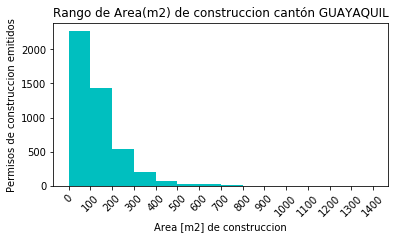

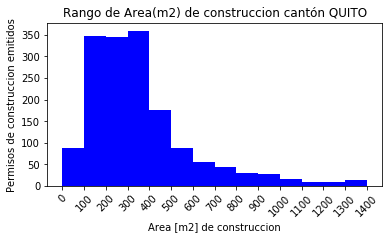

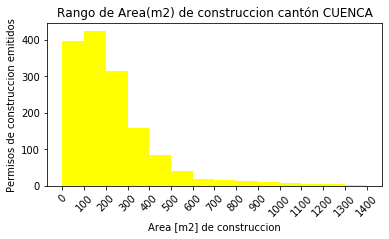

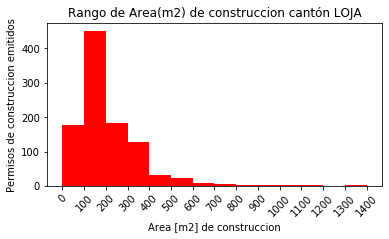

In [11]:
bins = range(0,1500,100)
gyem2 = df.loc[df['nombrecanton']=='GUAYAQUIL']
uiom2 = df.loc[df['nombrecanton']=='QUITO']
cuem2 = df.loc[df['nombrecanton']=='CUENCA']
lohm2 = df.loc[df['nombrecanton']=='LOJA']


plt.figure(figsize=(6,3))
plt.hist(gyem2['CARES'], bins = bins, color  = 'c')
plt.title('Rango de Area(m2) de construccion cantón GUAYAQUIL')
plt.xlabel('Area [m2] de construccion')
plt.ylabel('Permisos de construccion emitidos')
plt.xticks(bins, rotation = '45')
plt.show()


plt.figure(figsize=(6,3))
plt.hist(uiom2['CARES'], bins = bins, color  = 'b')
plt.title('Rango de Area(m2) de construccion cantón QUITO')
plt.xlabel('Area [m2] de construccion')
plt.ylabel('Permisos de construccion emitidos')
plt.xticks(bins, rotation = '45')
plt.show()


plt.figure(figsize=(6,3))
plt.hist(cuem2['CARES'], bins = bins, color  = 'yellow')
plt.title('Rango de Area(m2) de construccion cantón CUENCA')
plt.xlabel('Area [m2] de construccion')
plt.ylabel('Permisos de construccion emitidos')
plt.xticks(bins, rotation = '45')
plt.show()


plt.figure(figsize=(6,3))
plt.hist(lohm2['CARES'], bins = bins, color  = 'r')
plt.title('Rango de Area(m2) de construccion cantón LOJA')
plt.xlabel('Area [m2] de construccion')
plt.ylabel('Permisos de construccion emitidos')
plt.xticks(bins, rotation = '45')
plt.show()

# Area de Terreno

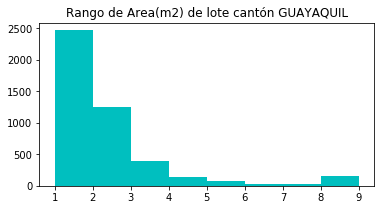

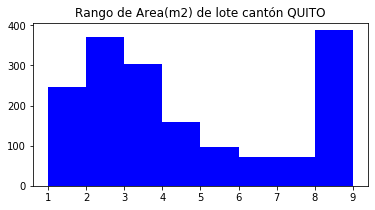

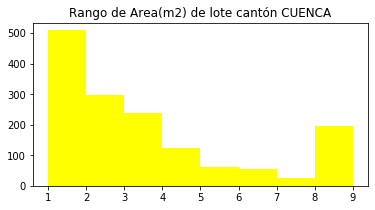

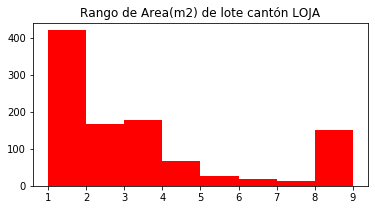

In [37]:
#GUAYAQUIL
bins2 = range(1,10,1)
xticks= range(0,800,100)
plt.figure(figsize=(6,3))
plt.hist(gyem2['CDISPSUT'], bins = bins2, color  = 'c')
plt.title('Rango de Area(m2) de lote cantón GUAYAQUIL')
plt.show()

#QUITO
plt.figure(figsize=(6,3))
plt.hist(uiom2['CDISPSUT'], bins = bins2, color  = 'b')
plt.title('Rango de Area(m2) de lote cantón QUITO')
plt.show()

#CUENCA
plt.figure(figsize=(6,3))
plt.hist(cuem2['CDISPSUT'], bins = bins2, color  = 'yellow')
plt.title('Rango de Area(m2) de lote cantón CUENCA')
plt.show()

#LOJA
plt.figure(figsize=(6,3))
plt.hist(lohm2['CDISPSUT'], bins = bins2, color  = 'r')
plt.title('Rango de Area(m2) de lote cantón LOJA')
plt.show()